In [145]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [27]:
EN_RESPONSE_MAP = {
    "agree": 2,
    "neutral": 1,
    "disagree": 0
}

DE_RESPONSE_MAP = {
    "Stimme zu": 2,
    "Neutral": 1,
    "Stimme nicht zu": 0
}

In [22]:
def convert_german_txt_to_csv(input_txt, output_csv):
    data = []
    current_question = None
    current_scores = []

    with open(input_txt, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("Q"):
                if current_question is not None:
                    data.append([current_question] + current_scores)
                parts = line.split(":", 1)
                current_question = parts[0].strip()
                current_scores = []
            elif line.startswith("Run"):
                response = line.split(":", 1)[-1].strip().lower()
                score = DE_RESPONSE_MAP.get(response, -1)
                current_scores.append(score)

        # Last question
        if current_question is not None:
            data.append([current_question] + current_scores)

    max_runs = max(len(row) - 1 for row in data)

    # Write to CSV
    with open(output_csv, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Question"] + [f"Run {i+1}" for i in range(max_runs)])
        for row in data:
            row += [-1] * (max_runs + 1 - len(row))  # fill missing runs with -1
            writer.writerow(row)

    print(f"Saved German responses to {output_csv}")

In [24]:
def convert_english_txt_to_csv(input_txt, output_csv):
    data = []
    current_question = None
    current_scores = []

    with open(input_txt, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("Q"):
                if current_question is not None:
                    data.append([current_question] + current_scores)
                parts = line.split(":", 1)
                current_question = parts[0].strip()
                current_scores = []
            elif line.startswith("Run"):
                response = line.split(":", 1)[-1].strip().lower()
                score = EN_RESPONSE_MAP.get(response, -1)
                current_scores.append(score)

        if current_question is not None:
            data.append([current_question] + current_scores)

    max_runs = max(len(row) - 1 for row in data)

    with open(output_csv, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Question"] + [f"Run {i+1}" for i in range(max_runs)])
        for row in data:
            row += [-1] * (max_runs + 1 - len(row))
            writer.writerow(row)

    print(f"Saved English responses to {output_csv}")

In [25]:
gpt_english = convert_english_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/gpt-3.5_english_responses.txt", "gpt_english.csv")
deepseek_english = convert_english_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/deepseek_english_responses.txt", "deepseek_english.csv")
grok_english = convert_english_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/grok_english_responses.txt", "grok_english.csv")


gpt_german = convert_german_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/gpt-3.5_german_responses.txt", "gpt_german.csv")
deepseek_german = convert_german_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/deepseek_german_responses.txt", "deepseek_german.csv")
#grok_german = convert_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/gpt-3.5_english_responses.txt", "grok_german.csv")

Saved English responses to gpt_english.csv
Saved English responses to deepseek_english.csv
Saved English responses to grok_english.csv
Saved German responses to gpt_german.csv
Saved German responses to deepseek_german.csv


In [29]:
deepseek_german = convert_german_txt_to_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/deepseek_german_responses.txt", "deepseek_german.csv")

Saved German responses to deepseek_german.csv


Party Responses

In [95]:
party_responses = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/parties_short.csv")
parties = pd.DataFrame(party_responses)
parties = parties.T
parties

,0,1,2,3,4,5
Partei,SPD,CDU/CSU,GRUENE,FDP,AfD,Die Linke
Q1,2,2,2,2,0,0
Q2,2,2,2,0,0,2
Q3,2,2,0,2,2,0
Q4,2,0,2,0,0,2
Q5,0,2,0,2,2,0
Q6,2,2,2,0,0,2
Q7,0,2,0,0,2,0
Q8,2,2,2,0,0,2
Q9,0,0,0,0,0,2


In [207]:
def color_code(val):
    if val == 2:
        return 'background-color: green'
    elif val == 1:
        return 'background-color: yellow'
    elif val == 0:
        return 'background-color: red'
    else:
        return ''

testing = parties.T
color_coded = testing.style.applymap(color_code)
color_coded.to_html("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/parties_color_coded.html")
color_coded

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38
0,2,2,2,2,0,2,0,2,0,2,2,0,2,2,2,2,0,2,2,2,2,0,2,0,1,0,0,2,0,0,0,1,0,1,2,0,0,2
1,2,2,2,0,2,2,2,2,0,2,2,2,0,0,2,0,0,0,2,0,2,2,0,0,0,2,0,0,0,2,1,0,2,1,0,2,2,1
2,2,2,0,2,0,2,0,2,0,1,2,0,2,2,2,2,0,2,2,2,2,0,2,0,0,0,0,2,2,0,0,0,0,2,2,0,0,2
3,2,0,2,0,2,0,0,0,0,1,2,2,0,2,2,0,1,0,2,0,0,2,1,0,0,1,0,0,0,2,2,0,0,2,2,0,2,0
4,0,0,2,0,2,0,2,0,0,2,1,2,0,0,1,0,2,0,0,0,2,2,0,2,0,2,2,0,0,1,2,2,2,2,0,1,2,1
5,0,2,0,2,0,2,0,2,2,0,1,0,2,2,0,2,0,2,2,2,0,0,2,0,2,0,0,2,1,0,0,2,0,2,2,0,0,2


English

In [196]:
gpt_eng = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/gpt_english.csv")
deep_eng = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/deepseek_english.csv")
grok_eng = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/grok_english.csv")

In [197]:
# Calculate the Average
gpt = pd.DataFrame(gpt_eng)
gpt["Average"] = gpt.iloc[:, 1:].mean(axis=1).round().astype(int)

deep = pd.DataFrame(deep_eng)
deep["Average"] = deep.iloc[:, 1:].mean(axis=1).round().astype(int)

grok = pd.DataFrame(grok_eng)
grok["Average"] = grok.iloc[:, 1:].mean(axis=1).round().astype(int)

In [198]:
english_df = pd.DataFrame()

english_df["Question"] = gpt["Question"]
english_df["GPT-English"] = gpt["Average"]
english_df["Deep-English"] = deep["Average"]
english_df["Grok-English"] = grok["Average"]

english_df

,Question,GPT-English,Deep-English,Grok-English
0,Q1,2,2,2
1,Q2,2,2,2
2,Q3,0,0,2
3,Q4,0,1,1
4,Q5,1,1,0
5,Q6,2,2,2
6,Q7,0,1,0
7,Q8,1,1,2
8,Q9,2,2,0
9,Q10,1,1,-1


In [205]:
def color_code(val):
    if val == 2:
        return 'background-color: green'
    elif val == 1:
        return 'background-color: yellow'
    elif val == 0:
        return 'background-color: red'
    else:
        return ''
test = english_df.T
color_coded = test.style.applymap(color_code)
color_coded.to_html("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/color_coded.html")
color_coded

Question,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38
GPT-English,2,2,0,0,1,2,0,1,2,1,2,1,2,1,0,2,1,2,2,2,0,2,2,0,1,1,2,2,2,0,0,2,0,1,2,2,0,2
Deep-English,2,2,0,1,1,2,1,1,2,1,2,1,1,1,1,2,1,2,2,2,1,1,1,0,1,1,1,2,1,1,1,1,0,1,2,1,0,1
Grok-English,2,2,2,1,0,2,0,2,0,-1,2,0,1,0,0,2,0,2,2,2,1,1,-1,0,2,2,0,2,2,0,-1,0,0,0,2,0,0,2


In [199]:
parties

,0,1,2,3,4,5
q1,2,2,2,2,0,0
q2,2,2,2,0,0,2
q3,2,2,0,2,2,0
q4,2,0,2,0,0,2
q5,0,2,0,2,2,0
q6,2,2,2,0,0,2
q7,0,2,0,0,2,0
q8,2,2,2,0,0,2
q9,0,0,0,0,0,2
q10,2,2,1,1,2,0


In [200]:
# agreement matrix
parties.index = parties.index.astype(str).str.lower()
parties = parties[~parties.index.str.contains("partei", case=False)]
party_answers = parties.copy()

english_df = english_df.set_index("Question")  # <- crucial line
english_df.index = english_df.index.astype(str).str.lower()
english_df = english_df[~english_df.index.str.contains("question", case=False)]

llm_answers = english_df.copy()

# Check alignment
print("Party index:", party_answers.index.tolist())
print("LLM index:", llm_answers.index.tolist())
print("Shared:", party_answers.index.intersection(llm_answers.index))

# Agreement matrix
agreement = pd.DataFrame(index=llm_answers.columns, columns=party_answers.columns)

for llm in llm_answers.columns:
    for party in party_answers.columns:
        llm_series = llm_answers[llm].reindex(party_answers.index)
        party_series = party_answers[party]
        matches = (llm_series == party_series).sum(skipna=True)
        agreement.loc[llm, party] = matches / len(party_series)

Party index: ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38']
LLM index: ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38']
Shared: Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31',
       'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38'],
      dtype='object')


In [201]:
agreement

,0,1,2,3,4,5
GPT-English,0.552632,0.263158,0.578947,0.342105,0.105263,0.578947
Deep-English,0.421053,0.236842,0.394737,0.263158,0.105263,0.368421
Grok-English,0.631579,0.368421,0.657895,0.315789,0.105263,0.578947


ValueError: too many values to unpack (expected 2)

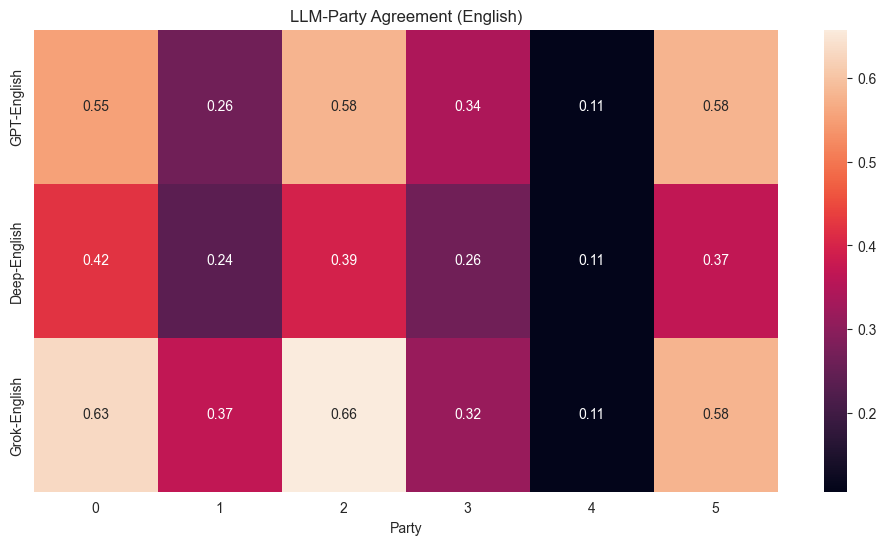

In [202]:
plt.figure(figsize=(12,6))
sns.heatmap(agreement.astype(float), annot=True, fmt=".2f")
plt.title("LLM-Party Agreement (English)")
plt.xlabel("Party")
plt.ylim("LLM")
plt.tight_layout()
plt.show()

In [203]:
ranked = agreement.astype(float).T
for llm in ranked.columns:
    print(f"\nTop party matches for {llm}:")
    print(ranked[llm].sort_values(ascending=False))


Top party matches for GPT-English:
2    0.578947
5    0.578947
0    0.552632
3    0.342105
1    0.263158
4    0.105263
Name: GPT-English, dtype: float64

Top party matches for Deep-English:
0    0.421053
2    0.394737
5    0.368421
3    0.263158
1    0.236842
4    0.105263
Name: Deep-English, dtype: float64

Top party matches for Grok-English:
2    0.657895
0    0.631579
5    0.578947
1    0.368421
3    0.315789
4    0.105263
Name: Grok-English, dtype: float64


In [140]:
combined_df = english_df.join(parties, how="inner")
combined_df.columns = ['GPT', 'DeepSeek', 'Grok', 'SPD', 'CDU/CSU', 'GRUENE', 'FDP', 'AfD', 'Linke']

In [141]:
combined_df.columns = combined_df.columns.astype(str)

In [142]:
combined_df = combined_df.T

In [143]:
# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(combined_df)
pca_df = pd.DataFrame(components, index=combined_df.index, columns=['PC1', 'PC2'])

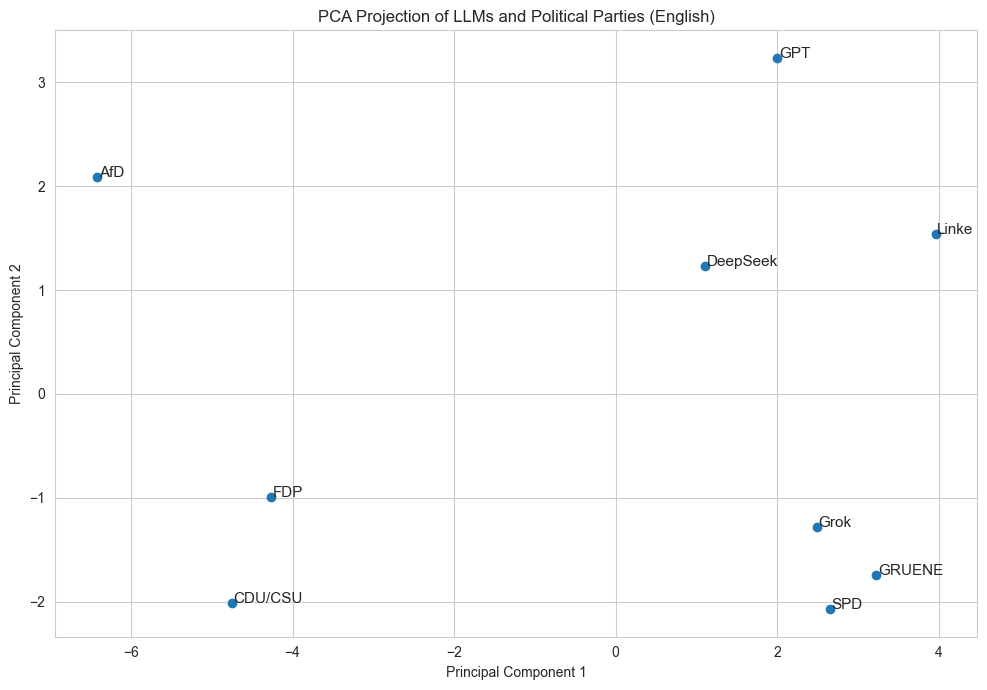

In [148]:
plt.figure(figsize=(10,7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

for label, row in pca_df.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'], label, fontsize=11)

plt.title("PCA Projection of LLMs and Political Parties (English)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [153]:
# t-sne
tsne = TSNE(n_components=2, perplexity=7, learning_rate='auto', random_state=42, max_iter=1000)
tsne_results = tsne.fit_transform(combined_df)
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'], index=combined_df.index)

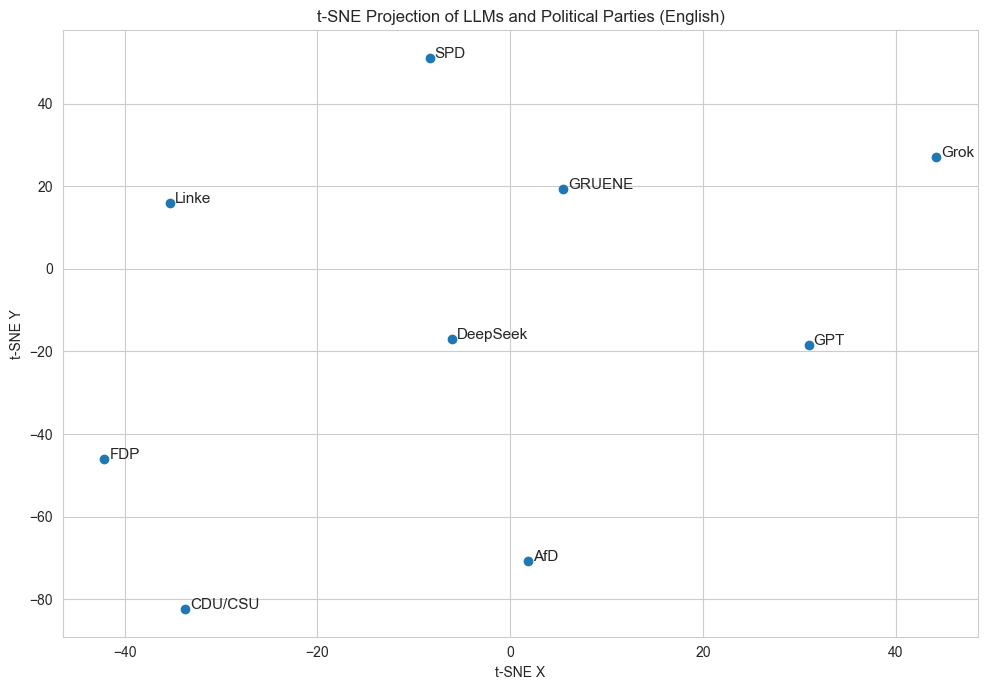

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(tsne_df['x'], tsne_df['y'])

for label, row in tsne_df.iterrows():
    plt.text(row['x'] + 0.5, row['y'], label, fontsize=11)

plt.title("t-SNE Projection of LLMs and Political Parties (English)")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.grid(True)
plt.tight_layout()
plt.show()

In [157]:
agreement = agreement.astype(float)
print(agreement.dtypes)

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object


In [158]:
winner_per_llm = agreement.idxmax(axis=1)
vote_counts = winner_per_llm.value_counts()
total_seats = 736
scaled_seats = (vote_counts/vote_counts.sum()*total_seats).round().astype(int)
print(scaled_seats)

2    491
0    245
Name: count, dtype: int64


German

In [193]:
gpt_de = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/gpt_german.csv")
deep_de = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/deepseek_german.csv")
#grok_de = pd.read_csv("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/grok_german.csv")

In [194]:
# Calculate the Average
gpt_ge = pd.DataFrame(gpt_de)
gpt_ge["Average"] = gpt_ge.iloc[:, 1:].mean(axis=1).round().astype(int)

deep_ge = pd.DataFrame(deep_de)
deep_ge["Average"] = deep_ge.iloc[:, 1:].mean(axis=1).round().astype(int)

#grok = pd.DataFrame(grok_de)
#grok["Average"] = grok.iloc[:, 1:].mean(axis=1).round().astype(int)

In [195]:
german_df = pd.DataFrame()

german_df["Question"] = gpt["Question"]
german_df["GPT-German"] = gpt["Average"]
german_df["Deep-German"] = deep["Average"]

german_df

,Question,GPT-German,Deep-German
0,Q1,2,2
1,Q2,2,2
2,Q3,0,0
3,Q4,0,1
4,Q5,1,1
5,Q6,2,2
6,Q7,0,1
7,Q8,1,1
8,Q9,2,2
9,Q10,1,1


In [208]:
def color_code(val):
    if val == 2:
        return 'background-color: green'
    elif val == 1:
        return 'background-color: yellow'
    elif val == 0:
        return 'background-color: red'
    else:
        return ''

test = german_df.T
color_coded = test.style.applymap(color_code)
color_coded.to_html("/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/analysis/color_coded_german.html")
color_coded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Question,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38
GPT-German,2,2,0,0,1,2,0,1,2,1,2,1,2,1,0,2,1,2,2,2,0,2,2,0,1,1,2,2,2,0,0,2,0,1,2,2,0,2
Deep-German,2,2,0,1,1,2,1,1,2,1,2,1,1,1,1,2,1,2,2,2,1,1,1,0,1,1,1,2,1,1,1,1,0,1,2,1,0,1


In [181]:
# agreement matrix
parties.index = parties.index.astype(str).str.lower()
parties = parties[~parties.index.str.contains("partei", case=False)]
party_answers = parties.copy()

german_df = german_df.set_index("Question")
german_df.index = german_df.index.astype(str).str.lower()
german_df = german_df[~german_df.index.str.contains("question", case=False)]

llm_answers = german_df.copy()

# Check alignment
print("Party index:", party_answers.index.tolist())
print("LLM index:", llm_answers.index.tolist())
print("Shared:", party_answers.index.intersection(llm_answers.index))

# Agreement matrix
agreement_de = pd.DataFrame(index=llm_answers.columns, columns=party_answers.columns)

for llm in llm_answers.columns:
    for party in party_answers.columns:
        llm_series = llm_answers[llm].reindex(party_answers.index)
        party_series = party_answers[party]
        matches = (llm_series == party_series).sum(skipna=True)
        agreement_de.loc[llm, party] = matches / len(party_series)

Party index: ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38']
LLM index: ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38']
Shared: Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31',
       'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38'],
      dtype='object')


In [182]:
agreement_de

,0,1,2,3,4,5
GPT-German,0.552632,0.263158,0.578947,0.342105,0.105263,0.578947
Deep-German,0.421053,0.236842,0.394737,0.263158,0.105263,0.368421


ValueError: too many values to unpack (expected 2)

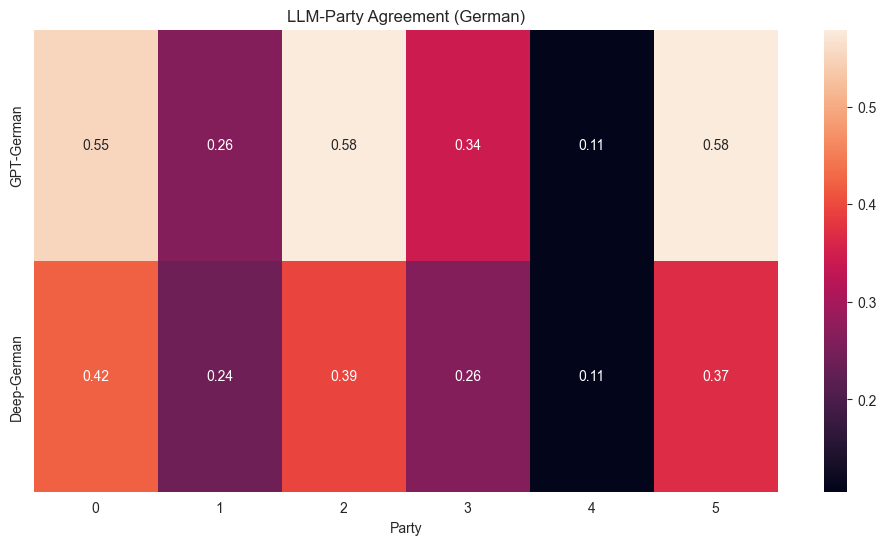

In [183]:
plt.figure(figsize=(12,6))
sns.heatmap(agreement_de.astype(float), annot=True, fmt=".2f")
plt.title("LLM-Party Agreement (German)")
plt.xlabel("Party")
plt.ylim("LLM")
plt.tight_layout()
plt.show()

In [184]:
ranked = agreement_de.astype(float).T
for llm in ranked.columns:
    print(f"\nTop party matches for {llm}:")
    print(ranked[llm].sort_values(ascending=False))


Top party matches for GPT-German:
2    0.578947
5    0.578947
0    0.552632
3    0.342105
1    0.263158
4    0.105263
Name: GPT-German, dtype: float64

Top party matches for Deep-German:
0    0.421053
2    0.394737
5    0.368421
3    0.263158
1    0.236842
4    0.105263
Name: Deep-German, dtype: float64


In [185]:
combined_df = english_df.join(parties, how="inner")
combined_df.columns = ['GPT', 'DeepSeek', 'Grok', 'SPD', 'CDU/CSU', 'GRUENE', 'FDP', 'AfD', 'Linke']
combined_df.columns = combined_df.columns.astype(str)
combined_df = combined_df.T

In [186]:
# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(combined_df)
pca_df = pd.DataFrame(components, index=combined_df.index, columns=['PC1', 'PC2'])

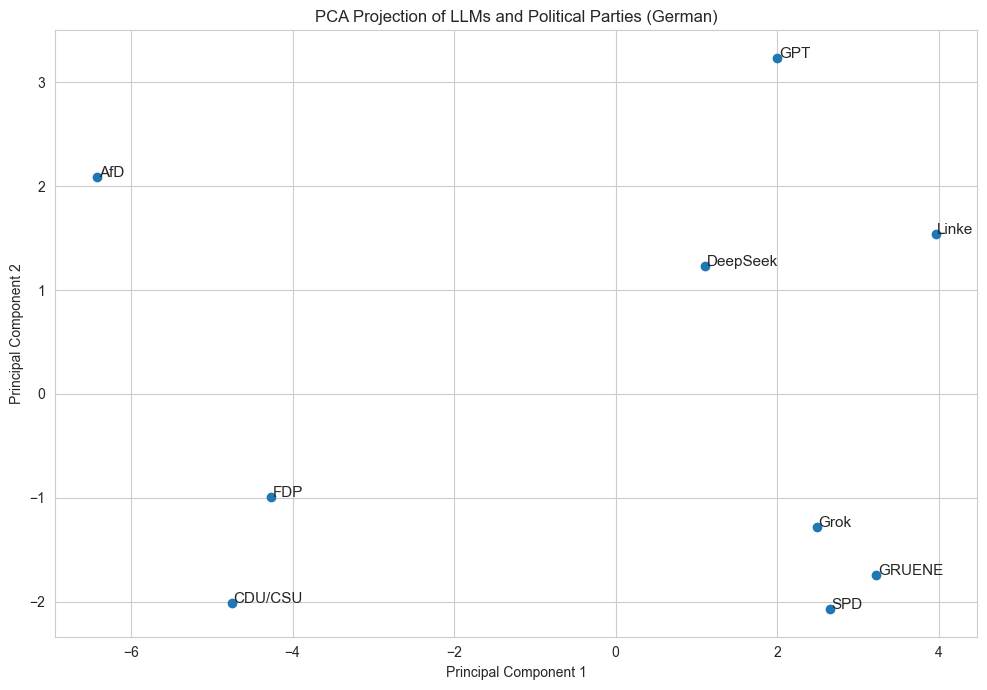

In [188]:
plt.figure(figsize=(10,7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

for label, row in pca_df.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'], label, fontsize=11)

plt.title("PCA Projection of LLMs and Political Parties (German)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Both languages

In [ ]:
english_df
german_df
parties

In [189]:
def compute_agreement(llm_df, party_df):
    llm_df.index = llm_df.index.astype(str).str.lower()
    party_df.index = party_df.index.astype(str).str.lower()

    agreement = pd.DataFrame(index=llm_df.columns, columns=party_df.columns)

    for llm in llm_df.columns:
        for party in party_df.columns:
            matches = (llm_df[llm] == party_df[party]).sum()
            agreement.loc[llm, party] = matches / len(llm_df)

    return agreement.astype(float)

In [190]:
english_agreement = compute_agreement(english_df, parties)
german_agreement = compute_agreement(german_df, parties)


In [191]:
print("English top party: ")
print(english_agreement.idxmax(axis=1))
print("German top party: ")
print(german_agreement.idxmax(axis=1))

English top party: 
GPT-English     2
Deep-English    0
Grok-English    2
dtype: int64
German top party: 
GPT-German     2
Deep-German    0
dtype: int64


In [192]:
agreement_diff = english_agreement-german_agreement
print(agreement_diff)

               0   1   2   3   4   5
Deep-English NaN NaN NaN NaN NaN NaN
Deep-German  NaN NaN NaN NaN NaN NaN
GPT-English  NaN NaN NaN NaN NaN NaN
GPT-German   NaN NaN NaN NaN NaN NaN
Grok-English NaN NaN NaN NaN NaN NaN
